# Module 2C
### Module 2 covers generating SPHARM-RPDM models, creating reports from models, and comparing models.
### Module 2C creates a synthetic cell using one of the models created in Module 2A

In [1]:
# Code Cell 1

from cellorganizer.tools import slml2img, slml2info
import os
from IPython.core.display import display, HTML, Image
import urllib.request
import tarfile 

folder_name = 'Module2C'
model_name =  'Module2A1' #SPHARM-RPDM models of cell and nuclear shape
model_file = "/home/murphylab/cellorganizer/local/models/" +  model_name + ".mat"

topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)

options = {}
options['numberOfSynthesizedImages'] = 1
options['synthesis'] = 'framework'
options['model.spharm_rpdm.synthesis_method'] = 'reconstruction'
options['model.spharm_rpdm.imageSize'] = [205, 205, 10]
options['targetDirectory'] = os.getcwd()
options['prefix'] = 'img'
options['compression'] = 'lzw'
options['debug'] = 0
options['verbose'] = 1
options['display'] = 0

answer = slml2img([model_file], options)

In [2]:
# Code Cell 2

from skimage import io
import numpy as np
img0 = np.transpose(io.imread(os.getcwd() + '/img/cell1/cell.tif'), (1, 2, 0))
img1 = np.transpose(io.imread(os.getcwd() + '/img/cell1/nucleus.tif'), (1, 2, 0))
print(img0.shape)
ishape = img0.shape
rgb=np.empty([ishape[0],ishape[1],3,ishape[2]],dtype=int)
print(np.amax(img0)) #max for all should be 255 (8-bit)
print(np.amax(img1))
rgb[:,:,0,:]=img0
rgb[:,:,1,:]=img1
rgb[:,:,2,:]=img1
print(rgb.shape)

(51, 83, 10)
255
255
(51, 83, 3, 10)


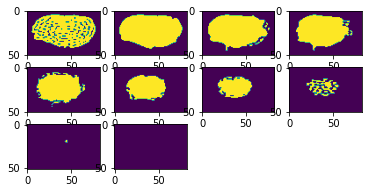

In [3]:
# Code Cell 3

import matplotlib.pyplot as plt
import math
#Plot the individual xy slices of the 3D image
fig = plt.figure()
panels = math.ceil(math.sqrt(img0.shape[2]))
for i in range(img0.shape[2]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(img0[:,:,i])
plt.show()

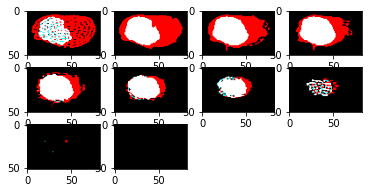

In [4]:
# Code Cell 4: Plot nucleus in white, cell in red

fig = plt.figure()
panels = math.ceil(math.sqrt(rgb.shape[3]))
for i in range(rgb.shape[3]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(rgb[:,:,:,i])
plt.show()

### Generate a report on one of the models generated by Module 2A and makes a movie of the evolution of one cell shape into another. 
### Run the cell below to set up basic parameters (note: it takes roughly 20 minutes to complete):

In [5]:
# Code Cell 5

folder_name = 'Module2C'
model_name = 'Module2A1'
model_file = "/home/murphylab/cellorganizer/local/models/" +  model_name + ".mat"
# optionally, change to read the version of the model files in the results directory of Module 2A 
#model_file = "/home/murphylab/cellorganizer/local/results/Module2A/" +  model_name + ".mat"

topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + os.path.sep + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
os.system("ls")
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
os.system("ls")
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)
os.system("ls")

options = {}
# possible values for 'shape_evolution' are 'none', 'random', ‘first two shapes',
# 'first and last shape' and 'given' (in which case options.pair_inds contains the given indices)
options['shape_evolution'] = 'first two shapes'
# possible values for 'makemovie' are 'none' or a video profile name.  Possible profiles are 
#     'Archival'         - Motion JPEG 2000 file with lossless compression
#     'Motion JPEG AVI'  - Compressed AVI file using Motion JPEG codec.
#     'Motion JPEG 2000' - Compressed Motion JPEG 2000 file
#     'MPEG-4'           - Compressed MPEG-4 file with H.264 encoding 
#                          (Windows 7 and Mac OS X 10.7 only)
#     'Uncompressed AVI' - Uncompressed AVI file with RGB24 video.
#     'Indexed AVI'      - Uncompressed AVI file with Indexed video.
#     'Grayscale AVI'    - Uncompressed AVI file with Grayscale video.
options['makemovie'] = 'Motion JPEG AVI'
options['num_steps'] = 20
options['labels'] = 'unique'
options['subsize'] = 400 #controls the size of the shape (larger number is smaller)
#options['viewangle'] = [0,90] #down z axis
#options['viewangle'] = [90,0] #side view
#options['viewangle'] = [45,45] #3D view

answer = slml2info([model_file], options)

HTML(filename = 'index.html')

CellOrganizer v2.10 (MATLAB RO2019a)


Cell Membrane File,Nuclear Membrane File,Parameter,Preprocessing Status
../../../images/HeLa/3D/processed/LAM_cell10_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell10_ch0_t1.tif,param1.mat.tmp,Rejected
../../../images/HeLa/3D/processed/LAM_cell11_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell11_ch0_t1.tif,param2.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell12_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell12_ch0_t1.tif,param3.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell13_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell13_ch0_t1.tif,param4.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell14_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell14_ch0_t1.tif,param5.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell15_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell15_ch0_t1.tif,param6.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell16_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell16_ch0_t1.tif,param7.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell17_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell17_ch0_t1.tif,param8.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell18_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell18_ch0_t1.tif,param9.mat,Accepted
../../../images/HeLa/3D/processed/LAM_cell19_ch1_t1.tif,../../../images/HeLa/3D/processed/LAM_cell19_ch0_t1.tif,param10.mat,Accepted


In [6]:
# Code Cell 6

from IPython.display import Video
video_path='ShapeEvolutionMovie.avi'
Video(video_path, width=640, height=360, embed=True)